<a href="https://colab.research.google.com/github/Siddarth305/Weather_Analysis/blob/main/WeatherAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Column names in the dataset: Index(['Date', 'Weather_Condition', 'Dew_Point (°C)', 'Humidity (%)',
       'Pressure (hPa)', 'Temperature (°C)', 'Visibility (km)',
       'Wind_Direction (Compass)', 'Rain_Presence'],
      dtype='object')
Highest Temperature Date: 2015-05-25 00:00:00
Average Humidity: 36.34
Median Visibility: 2.0
Most Frequent Wind Direction: WNW
Weather Condition with Highest Avg Temp: Widespread Dust, 39.48°C


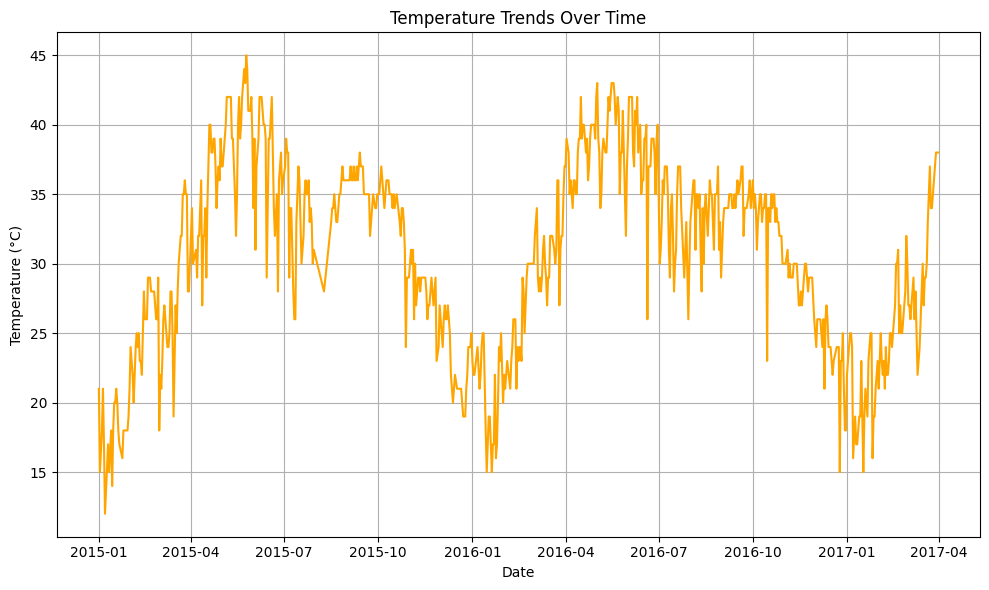

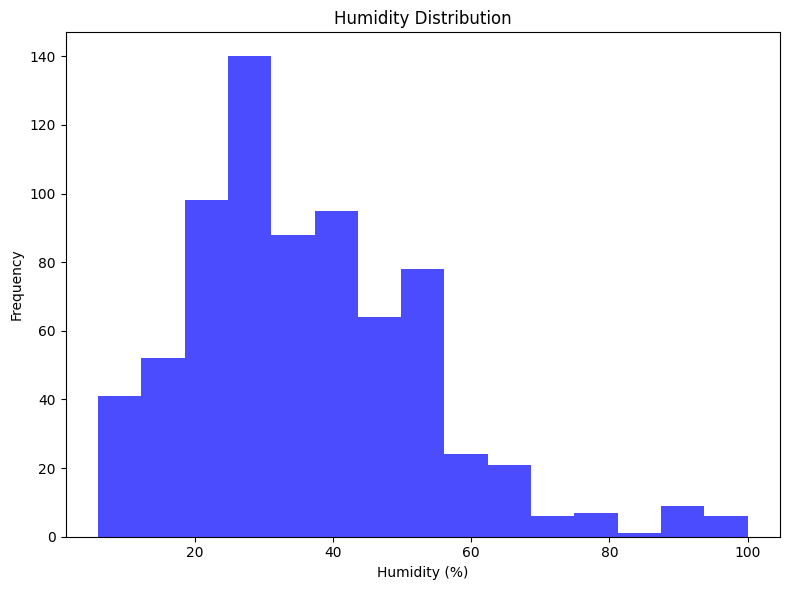

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted Rain Presence: 0
Final Cluster Centers:
[[  14.43067227   26.52521008 1008.54201681   31.8697479     2.63529412]
 [  20.78346457   54.74015748 1006.24409449   28.75984252    2.00984252]]
Record assigned to Cluster 1
Summary table saved as 'summary_table.csv'


In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean

# Load the dataset
file_path = '/content/final_weather_data.csv'  # Update this path as necessary
weather_data = pd.read_csv(file_path)

# Print the column names to check for discrepancies
print("Column names in the dataset:", weather_data.columns)

# Convert Date column to datetime
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

# ===== Section 1: EDA ===== #

# Highest temperature
highest_temp_row = weather_data.loc[weather_data['Temperature (°C)'].idxmax()]
highest_temp_date = highest_temp_row['Date']
print("Highest Temperature Date:", highest_temp_date)

# Average humidity
average_humidity = weather_data['Humidity (%)'].mean()
print("Average Humidity:", round(average_humidity, 2))

# Median visibility
median_visibility = weather_data['Visibility (km)'].median()
print("Median Visibility:", median_visibility)

# Most frequent wind direction
most_frequent_wind_dir = weather_data['Wind_Direction (Compass)'].mode()[0]  # Ensure correct column name
print("Most Frequent Wind Direction:", most_frequent_wind_dir)

# Weather condition with highest average temperature
avg_temp_by_condition = weather_data.groupby('Weather_Condition')['Temperature (°C)'].mean()
highest_temp_condition = avg_temp_by_condition.idxmax()
highest_avg_temp = avg_temp_by_condition.max()
print(f"Weather Condition with Highest Avg Temp: {highest_temp_condition}, {highest_avg_temp:.2f}°C")

# Plot 1: Temperature Trends Over Time
plt.figure(figsize=(10, 6))
plt.plot(weather_data['Date'], weather_data['Temperature (°C)'], color='orange')
plt.title('Temperature Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.savefig('temperature_trends.jpg')
plt.show()

# Plot 2: Humidity Distribution Histogram
plt.figure(figsize=(8, 6))
plt.hist(weather_data['Humidity (%)'], bins=15, color='blue', alpha=0.7)
plt.title('Humidity Distribution')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('humidity_distribution.jpg')
plt.show()

# ===== Section 2: K-NN ===== #
# Preparing data for K-NN
knn_data = weather_data[['Dew_Point (°C)', 'Humidity (%)', 'Pressure (hPa)', 'Temperature (°C)', 'Visibility (km)', 'Rain_Presence']]
knn_data = knn_data.dropna()  # Drop rows with missing values

# Input for prediction
new_record = np.array([13, 60, 1018, 20, 1]).reshape(1, -1)

# Features and target
X = knn_data.iloc[:, :-1]
y = knn_data['Rain_Presence']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
new_record_scaled = scaler.transform(new_record)

# KNN Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

# Predict Rain Presence
prediction = knn.predict(new_record_scaled)
print("Predicted Rain Presence:", prediction[0])

# ===== Section 3: K-Means ===== #
# Preparing data for clustering
kmeans_data = weather_data[['Dew_Point (°C)', 'Humidity (%)', 'Pressure (hPa)', 'Temperature (°C)', 'Visibility (km)']]
kmeans_data = kmeans_data.dropna()  # Drop rows with missing values

# KMeans Initialization
initial_centers = kmeans_data.iloc[[0, 1], :].values  # Using first two rows as initial centers
kmeans = KMeans(n_clusters=2, init=initial_centers, n_init=1, max_iter=300)
kmeans.fit(kmeans_data)

# Cluster Centers
cluster_centers = kmeans.cluster_centers_
print("Final Cluster Centers:")
print(cluster_centers)

# Assign cluster for a specific record (e.g., record for "12-Jan-2016")
record_to_assign = kmeans_data.iloc[11].values
distances_to_centers = [euclidean(record_to_assign, center) for center in cluster_centers]
assigned_cluster = np.argmin(distances_to_centers) + 1
print(f"Record assigned to Cluster {assigned_cluster}")

# ===== Section 4: Summary Table ===== #
summary_stats = weather_data.describe().loc[['mean', '50%', 'max', 'min'], ['Temperature (°C)', 'Humidity (%)', 'Visibility (km)']]
summary_stats.rename(index={'50%': 'median'}, inplace=True)
summary_stats.to_csv('summary_table.csv')
print("Summary table saved as 'summary_table.csv'")


# New Section